# Dalga


#### Dalga kavramları

T: Dalga periyodu (sn)

f: Dalga frekansı (Hz)

Dalga boyu: $ \lambda=\Large\frac{gT^{2}}{2\pi}$

Dalga yüksekliği: $ H=2 \zeta$

Dalga periyodu: $ T=\Large\sqrt{\frac{2\pi\lambda}{g}}=\Large\frac{1}{f}$

Dalga hızı: $ C=\Large\frac{\lambda}{T}=\Large\frac{gT}{2\pi}$

Dalga sayısı: $ k=\Large\frac{2\pi}{\lambda}=\Large\frac{\omega^{2}}{g}$

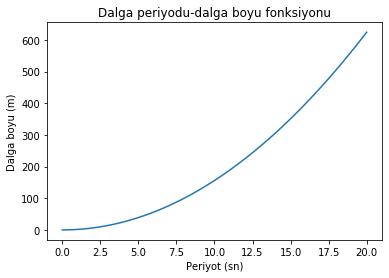

In [70]:
import math
import numpy as np
from math import pi
from scipy.constants import g
import matplotlib.pyplot as plt

def dalgaBoyu(T):
    Lambda = (g*(np.power(T,2))/(2*pi))
    return(Lambda)

x = np.linspace(0,20)
y = dalgaBoyu(l)

plt.plot(x,y)
plt.xlabel('Periyot (sn)')
plt.ylabel('Dalga boyu (m)')
plt.title("Dalga periyodu-dalga boyu fonksiyonu")
plt.show()

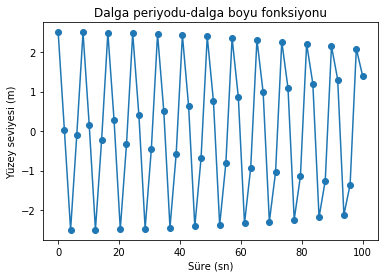

In [38]:
import math
import numpy as np
from math import pi
from scipy.constants import g
import matplotlib.pyplot as plt

def dalga(dalga_yuksekligi,dalga_sayisi,x,omega,t):
    # dalga_genligi [m]
    # dalga_sayisi [rad/m]
    # x [m]
    # omega [rad/s]
    # t [s]
    
    dalga_genligi = dalga_yuksekligi/2
    zeta = dalga_genligi*np.cos(dalga_sayisi*x-omega*t)
    return(zeta)

x = np.linspace(0,100)
y = dalga(5,4,0,10,x)

plt.plot(x,y,'o-')
plt.xlabel('Süre (sn)')
plt.ylabel('Yüzey seviyesi (m)')
plt.title("Dalga periyodu-dalga boyu fonksiyonu")
plt.show()

### Dalga spektrumları

Dalga spektrumları fiziksel gerçekliğin idealize edilmiş halidir.

#### Pierson-Moskowitz (1964)

$S_{\zeta}(\omega)=\Large\frac{A}{\omega^{5}}\exp\Bigl(\frac{B}{\omega^{4}}\Bigr)$

$ A = 0.0081g^{2}$

$ B = 0.032\Large\frac{g^{2}}{H_{s}^{2}}$

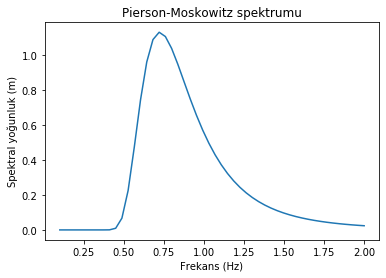

In [48]:
import math
import numpy as np
from math import pi
from scipy.constants import g
import matplotlib.pyplot as plt

def spektrumPM(omega,Hs):
    A = 0.0081*g**2
    B = 0.032*(g**2/Hs**2)
    S = (A/np.power(omega,5))*np.exp(-B/np.power(omega,4))
    return(S)

x = np.linspace(0.1,2)
y = spektrumPM(x,3)

plt.plot(x,y)
plt.xlabel('Frekans (Hz)')
plt.ylabel('Spektral yoğunluk (m)')
plt.title("Pierson-Moskowitz spektrumu")
plt.show()

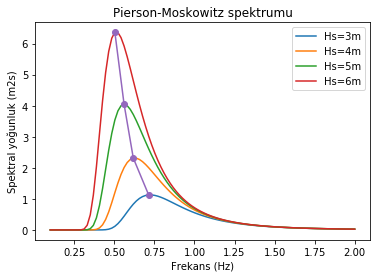

In [69]:
import math
import numpy as np
from math import pi
from scipy.constants import g
import matplotlib.pyplot as plt

def spektrumPM(omega,Hs):
    A = 0.0081*g**2
    B = 0.032*(g**2/Hs**2)
    S = (A/np.power(omega,5))*np.exp(-B/np.power(omega,4))
    return(S)

x = np.linspace(0.1,2,100)
y3 = spektrumPM(x,3)
y4 = spektrumPM(x,4)
y5 = spektrumPM(x,5)
y6 = spektrumPM(x,6)

x_ = [x[np.argmax(y3)],x[np.argmax(y4)],x[np.argmax(y5)],x[np.argmax(y6)]]
y_ = [max(y3),max(y4),max(y5),max(y6)]

plt.plot(x,y3,x,y4,x,y5,x,y6)
plt.plot(x_,y_,'o-')
plt.legend(['Hs=3m','Hs=4m','Hs=5m','Hs=6m'])
plt.xlabel('Frekans (Hz)')
plt.ylabel('Spektral yoğunluk (m2s)')
plt.title("Pierson-Moskowitz spektrumu")
plt.show()

#### JONSWAP Spektrum (1973)

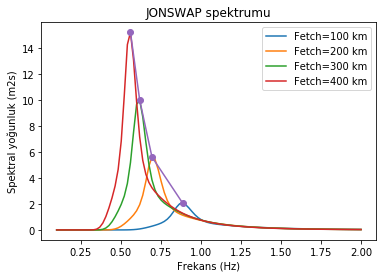

In [80]:
import math
import numpy as np
from math import pi
from scipy.constants import g
import matplotlib.pyplot as plt

def spektrumJONSWAP(U10,Fetch,omega):
    #U10 [m/s]
    #Fetch [m]
    S = []
    A = 0.076*math.pow(U10**2/(Fetch*g),0.22)
    omegaP = 22*math.pow(g**2/(U10*Fetch),1/3)
    for w in omega:
        if w <= omegaP:
            sigma = 0.07
        else:
            sigma = 0.09
        r = math.exp(-1*math.pow(w-omegaP,2)/(2*sigma**2*omegaP**2))
        S_ = ((A*g**2)/math.pow(w,5))*np.exp(-1.25*math.pow(omegaP/w,4))*math.pow(3.3,r)
        S.append(S_)
    return(S)

x = np.linspace(0.1,2,100)
y100 = spektrumJONSWAP(15,100000,x)
y200 = spektrumJONSWAP(15,200000,x)
y300 = spektrumJONSWAP(15,300000,x)
y400 = spektrumJONSWAP(15,400000,x)

x_ = [x[np.argmax(y100)],x[np.argmax(y200)],x[np.argmax(y300)],x[np.argmax(y400)]]
y_ = [max(y100),max(y200),max(y300),max(y400)]

plt.plot(x,y100,x,y200,x,y300,x,y400)
plt.plot(x_,y_,'o-')
plt.legend(['Fetch=100 km','Fetch=200 km','Fetch=300 km','Fetch=400 km'])
plt.xlabel('Frekans (Hz)')
plt.ylabel('Spektral yoğunluk (m2s)')
plt.title("JONSWAP spektrumu")
plt.show()

# Ödev -1

Pierson-Moskowitz spektrumunun modal frekansını veren formül;

$\omega_{m}=\Large0.4\sqrt{\frac{g}{H_{s}}}$

yine PM spektrumunun en yüksek değerini veren formül;

$S_{\zeta max}(\omega_{m})=0.072H_{s}^{2.5}$

PM spektrumunun grafiğini modal frekansı kapsayacak bir aralıkta çizdiriniz. Çizdirdiğiniz aralıkta bulduğunuz maksimum değer ve o değerin frekansı ile yukarıda paylaşılan formülleri karşılaştırınız. Sonucu yorumlamanızı rica ederiz. İpucu: spekturumun maksimum değerini bulurken max(), maksimum değeri veren frekansı bulurken np.argmax() fonksiyonları işinize yarayabilir. İstediğiniz başka yöntemi de kullanabilirsiniz.

# Ödev -2

Bretschneider ve Ochi-Hubble spektrumlarını 3 farklı dalga boyu için tek bir grafikte karşılaştırınız.


In [ ]:
def maksPM(Hs):
    return(0.072*(Hs**2.5))

print(max(y6))
print(np.argmax(y6))
print(x[21])
print(maksPM(6))
print(0.4*math.sqrt(g/6))

#### Bretschneider (1957)

#### ISSC

#### Ochi-Hubble

#### Dalga spektrumu kavramları

### Karadenizde doğalgaz bulunan Tuna-1 kuyusu

In [89]:
from IPython.display import HTML
HTML('<iframe src="https://www.google.com/maps/embed?pb=!1m14!1m8!1m3!1d3927145.695541726!2d29.318853260932283!3d43.45798446818677!3m2!1i1024!2i768!4f13.1!3m3!1m2!1s0x0%3A0x0!2zNDLCsDUwJzIxLjciTiAzMcKwMTcnMjEuNiJF!5e1!3m2!1sen!2str!4v1604541595293!5m2!1sen!2str" width="600" height="450" frameborder="0" style="border:0;" allowfullscreen="" aria-hidden="false" tabindex="0"></iframe>')